In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cancer-prediction-dataset/The_Cancer_data_1500_V2.csv


In [8]:
df = pd.read_csv('/kaggle/input/cancer-prediction-dataset/The_Cancer_data_1500_V2.csv')

In [9]:
df

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
...,...,...,...,...,...,...,...,...,...
1495,62,1,25.090025,0,0,9.892167,1.284158,0,1
1496,31,0,33.447125,0,1,1.668297,2.280636,1,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0,1
1498,55,0,25.568216,0,0,7.795317,1.986138,1,1


In [11]:
df.shape

(1500, 9)

In [12]:
df.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


In [14]:
df.isnull().sum()

Age                 0
Gender              0
BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64

In [15]:
df.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


In [19]:
df.Age.value_counts().index

Index([52, 45, 66, 79, 54, 70, 56, 47, 24, 77, 68, 21, 64, 44, 58, 55, 27, 20,
       43, 25, 42, 31, 59, 72, 51, 22, 73, 63, 71, 74, 33, 41, 80, 36, 48, 49,
       30, 67, 76, 34, 23, 32, 29, 28, 38, 35, 57, 78, 75, 46, 39, 40, 50, 60,
       61, 53, 37, 69, 62, 26, 65],
      dtype='int64', name='Age')

<Axes: xlabel='Age'>

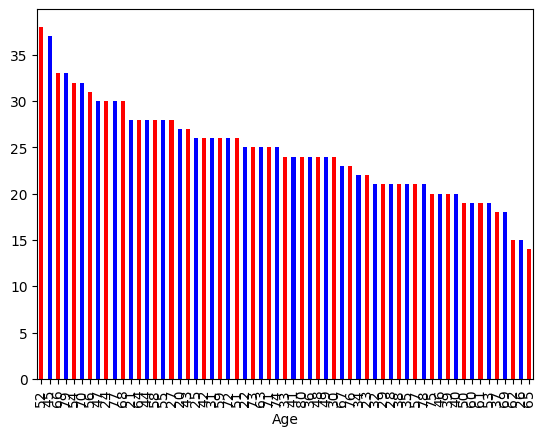

In [20]:
df['Age'].value_counts().plot(kind='bar',  color= [x for x in ['r', 'b']])

Here, kind='barh' specifies a horizontal bar plot, where the values of 'Age' will be on the y-axis. This will plot the count of each age category with colors specified as red ('r') and blue ('b')

<Axes: ylabel='Age'>

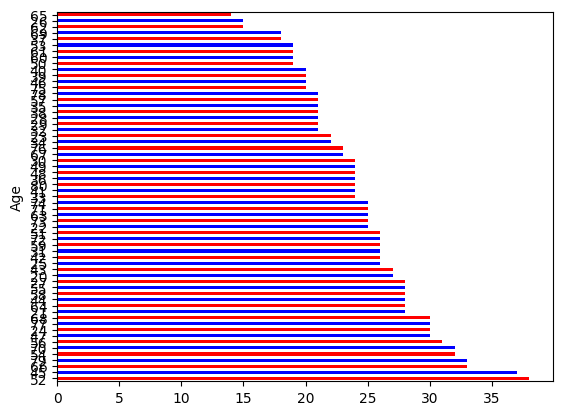

In [21]:
df['Age'].value_counts().plot(kind='barh', color=['r', 'b'])


## Nothing looks good for age distribution lets switch to histogram plot

Text(0, 0.5, 'Count of People')

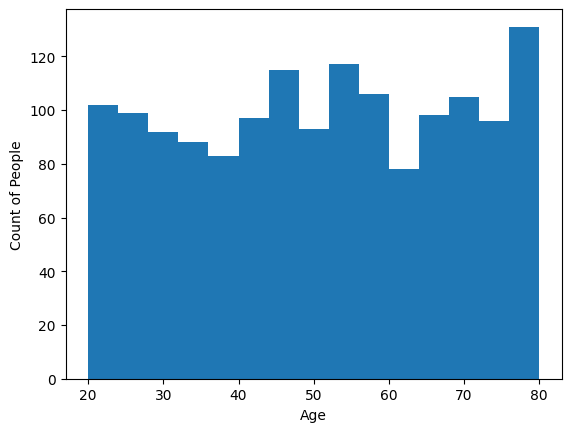

In [29]:
plt.hist(df['Age'], bins=15 )
plt.xlabel("Age")
plt.ylabel("Count of People")

more accurate visulisation

Text(0, 0.5, 'Count of People')

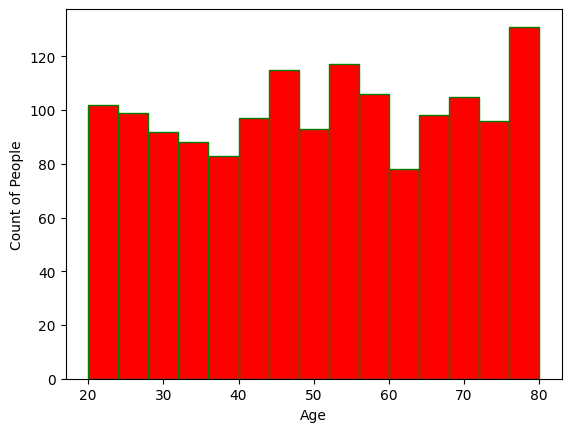

In [32]:
plt.hist(df['Age'], bins=15,color='r', edgecolor='g' )
plt.xlabel("Age")
plt.ylabel("Count of People")

we can see the distribution of people from this

## Not proper clear lets use a box plot

<Axes: >

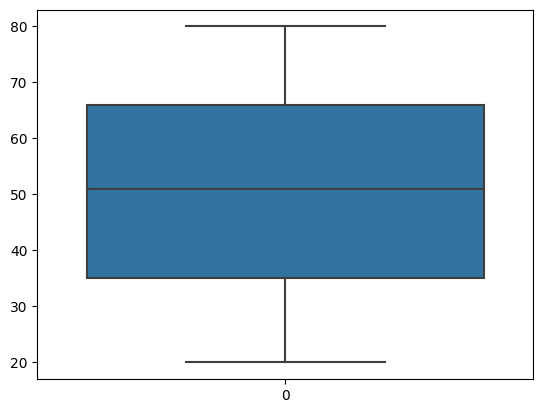

In [33]:
sns.boxplot(df['Age'])

most of the peoples age are between 35 and 65.

## analysing age column
    results  most of the people are between 35 and 65 
            with 25% of people less than 35
                 50% of people less than 51
                 75% of people less than 66

## Gender column

In [40]:
df['Gender'].value_counts()

Gender
0    764
1    736
Name: count, dtype: int64

data consists of 764  male and 736 female sets.

<Axes: xlabel='Gender'>

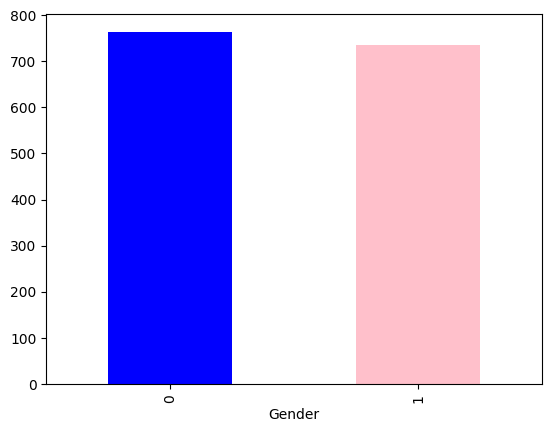

In [39]:
df['Gender'].value_counts().plot(kind='bar',color= [x for x in ['b', 'pink']])

## Smoking

In [42]:
df['Smoking'].value_counts()

Smoking
0    1096
1     404
Name: count, dtype: int64

<Axes: xlabel='Smoking'>

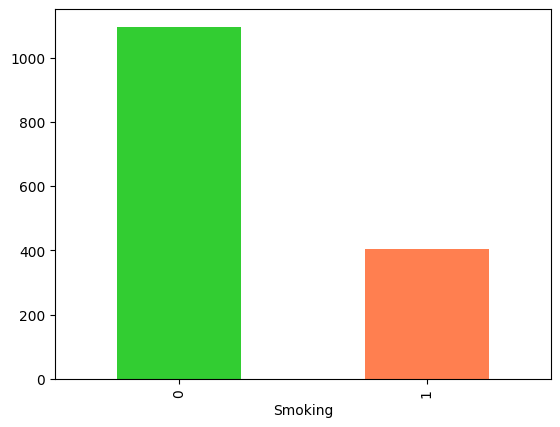

In [45]:
df['Smoking'].value_counts().plot(kind='bar',color= [x for x in ['limegreen', 'coral']] )

so 1096 people are not smoking and 404 people are smoking

## Genitic Risk

In [49]:
df.columns

Index(['Age', 'Gender', 'BMI', 'Smoking', 'GeneticRisk', 'PhysicalActivity',
       'AlcoholIntake', 'CancerHistory', 'Diagnosis'],
      dtype='object')

In [52]:
df['GeneticRisk'].value_counts()

GeneticRisk
0    895
1    447
2    158
Name: count, dtype: int64

<Axes: ylabel='count'>

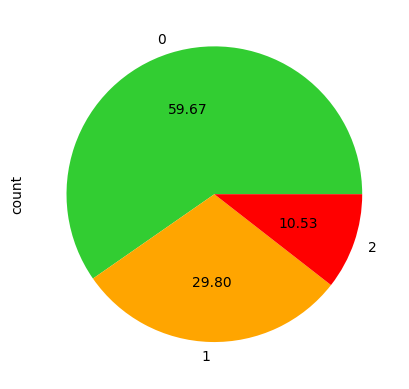

In [57]:
df['GeneticRisk'].value_counts().plot(kind='pie', autopct='%.2f',colors= [x for x in ['limegreen', 'orange', 'r']])

so 59.67% of people has low genetic risk, 29.80% has medium and 10.53% has high